### ML Final Group Project 
#### Group Member: Yunpeng Hou | Wanlin Deng | Yuchao Wang | Kunyang Que

#  Telecom Customers & Sales Analysis

### Brief Description: <br>Telecom is a nationwide company that provides telephone, TV,  Internet and other services to customers in the U.S. There are two main objectives of our project: customer segmentation and predicting customer behavior. The dataset includes following features of each customer: gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges.

### Objective: 
#### 1.	Target marketing based on customer segmentation 
    We use K-Means to divide our customers into 4 different groups, and then marketing department employees can utilize this information to target the customers.  
#### 2.	Predict customer behavior for potential purchases
    Regression: Based on customer personal information, we can predict how much money such customers would like to spend in the future. 
#### 3.	Create a product recommendation system 
    Classification: Based on customer personal information, we can predict which contract s/he may be interested in signing, so we can also target our customers with different   marketing strategies. 

### Project Structure

    Data Cleaning

    1) Unsupervised Model: K-Means
         
    2）Supervised Model: Regression 
        2.1 Data Preprocessing - One Hot Encoder
        2.2 Data Preprocessing - Principle Component Analysis
        2.3 Linear Regression - Ordinary Least Square
        2.4 Linear Regression - Ridge

    3) Supervised Model: Classification
        3.1 Data Preprocessing - One Hot Encoder
        3.2 Data Preprocessing - Standardization
        3.3 Classification Models
            3.3.1 Logistic Regression 
            3.3.2 Classification Tree
            3.3.3 K Nearest Neighbors
            3.3.4 Naive Bayes 
            3.3.5 Support Vector Machine 
            3.3.6 Neural Network w/ Logistic Activation Function 
            3.3.7 Table of Accuracy Score
        3.4 Cross Validation for Best Model
        3.5 Evaluation Score for Best Model
        3.6 Test Best Model by Random Features  
                      
    Summary          


# Data Cleaning 

In [1]:
import numpy as np
from numpy import *
from numpy import linalg as LA

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
df = pd.read_csv('Telecom_Customers.csv')

In [4]:
print("Number of rows and columns:",df.shape)
print(df.columns)

Number of rows and columns: (7043, 20)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
dtype: object

In [6]:
# Change 'TotalCharges' from string to float
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors='coerce')

In [7]:
# Check whether exist missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64

In [8]:
# Replace the missing value with median value
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace = True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


# 1) Unsupervised Model - KMeans

In [10]:
numeric_features = df[["tenure", "MonthlyCharges"]]
numeric_features.head(10)

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70
5,8,99.65
6,22,89.10
7,10,29.75
8,28,104.80
9,62,56.15


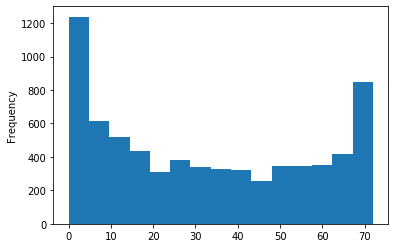

In [11]:
# Data Visualization 
numeric_features['tenure'].plot.hist(bins=15)

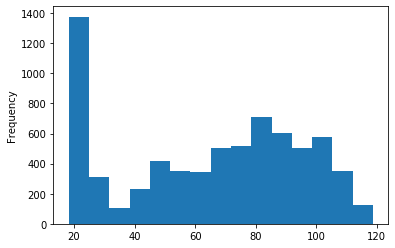

In [12]:
numeric_features['MonthlyCharges'].plot.hist(bins=15)

In [13]:
# Standardization 
df_kmeans = df.copy()
df_temp=df.copy()
df_kmeans['index_col'] = df.index.astype('int64')
df_temp['index_col'] = df.index.astype('int64')
df_kmeans["MonthlyCharges"]=(df_kmeans[["MonthlyCharges"]]-df_kmeans["MonthlyCharges"].mean())/df_kmeans[["MonthlyCharges"]].std()
df_kmeans["MonthlyCharges"].head(10)

0   -1.160241
1   -0.259611
2   -0.362635
3   -0.746482
4    0.197351
5    1.159463
6    0.808849
7   -1.163564
8    1.330616
9   -0.286197
Name: MonthlyCharges, dtype: float64

In [14]:
df_kmeans["tenure"] = (df_kmeans[["tenure"]]-df_kmeans["tenure"].mean())/df_kmeans[["tenure"]].std()
df_kmeans["tenure"].head(10)

0   -1.277354
1    0.066323
2   -1.236636
3    0.514215
4   -1.236636
5   -0.992332
6   -0.422287
7   -0.910897
8   -0.177982
9    1.206412
Name: tenure, dtype: float64

In [15]:
X = df_kmeans.loc[:, ["index_col","tenure", "MonthlyCharges"]].values
X[:,1:3]

array([[-1.27735389, -1.16024054],
       [ 0.06632271, -0.25961051],
       [-1.23663642, -0.36263461],
       ...,
       [-0.87017916, -1.16854893],
       [-1.15520147,  0.32031547],
       [ 1.36928184,  1.35886486]])

In [16]:
m=X.shape[0] 
n=X.shape[1]-1
n_iter=100
Centroids=np.array([]).reshape(n,0) 
K=4

In [17]:
import random as rd
rd.seed(10)

for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[:,1:3][rand]]

In [18]:
Output={}

for i in range(n_iter):
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X[:,1:3]-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    C=np.argmin(EuclidianDistance,axis=1)+1
    
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(3,0)
     
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
        
    for k in range(K):
        Y[k+1]=Y[k+1].T        
        
    for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1][:,1:3],axis=0)
    
    Output=Y

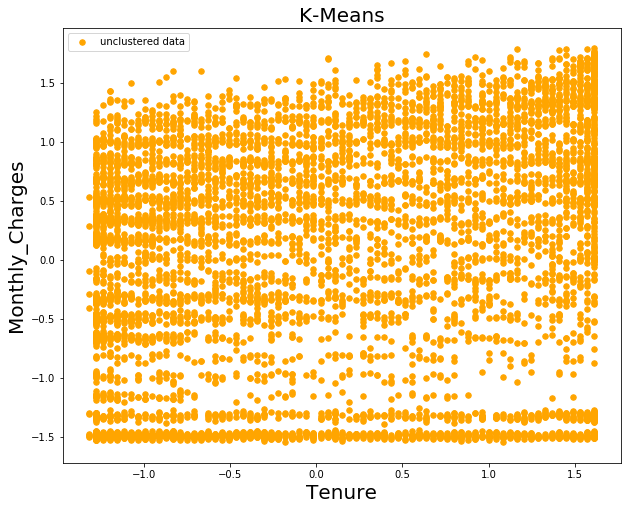

In [19]:
# Original Dataset 
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

plt.scatter(X[:,1],X[:,2],c='orange',label='unclustered data',s=30)
plt.xlabel('Tenure', size=20)
plt.ylabel('Monthly_Charges', size=20)
plt.legend()
plt.title('K-Means', size=20)
plt.show()

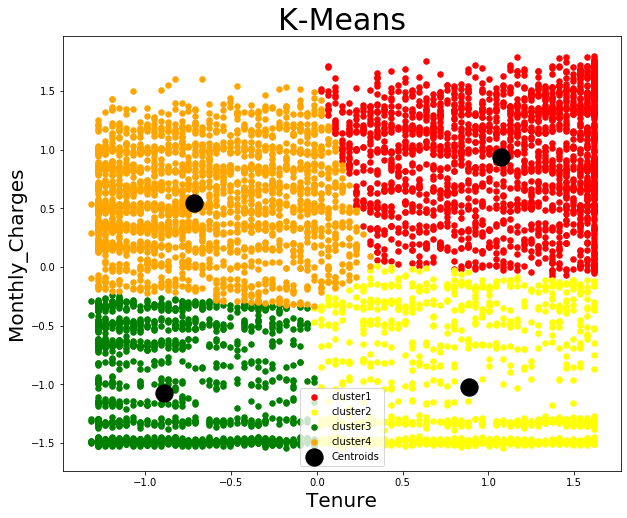

In [20]:
# Clustering Dataset
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

color=['red','yellow','green','orange']
labels=['cluster1','cluster2','cluster3','cluster4']
for k in range(K):
    plt.scatter(Output[k+1][:,1],Output[k+1][:,2],c=color[k],label=labels[k],s=30)
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='black',label='Centroids')
plt.xlabel('Tenure', size=20)
plt.ylabel('Monthly_Charges', size=20)
plt.legend(loc="lower center")
plt.title('K-Means', size=30)
plt.show()

### > Cluster1(Red): For higher charges and higher tenure, they are Loyal Customers so that we can build a swat team. Consider 1:1 rep to the customer to reduce risk.
### > Cluster2(Yellow): For lower charges and higher tenure, they are Retained Customers so that we can consider outsource option or cut the tail.
### > Cluster3(Green): For lower charges and lower tenure, they are Hibernators so that we can ignite sales via cross-sale/upscale offers and have higher touch and personalization.
### > Cluster4(Orange): For higher charges and lower tenure, they are Potential Customers (NOT Prospective Customers) so that we can continue the current customer treatment strategy to provide best Customer Relationship Management service. 

In [21]:
# Assign label to each cluster
ds=pd.DataFrame.from_dict(Output,orient='index')

def give_label(i):
    g=ds.iloc[i][0]
    g_label=(i+1)*ones(len(g)).reshape(len(g),1)
    return concatenate((g,g_label), axis=1)

arr_kmeans=concatenate((give_label(0),give_label(1),give_label(2),give_label(3)),axis=0)
df_kmeans=pd.DataFrame(arr_kmeans,columns=['index_col','tenure','MonthlyCharges','Clustering label'])
df_kmeans["tenure"] = df_kmeans["tenure"] * df["tenure"].std() + df["tenure"].mean()
df_kmeans["MonthlyCharges"] = df_kmeans["MonthlyCharges"] * df["MonthlyCharges"].std() + df["MonthlyCharges"].mean()
df_kmeans['tenure'] = df_kmeans['tenure'].astype(({'tenure': 'int64'}))
df_kmeans['index_col'] = df_kmeans['index_col'].astype(({'index_col': 'int64'}))
df_kmeans['Clustering label'] = df_kmeans['Clustering label'].astype(({'Clustering label': 'str'}))

df_kmeans=df_kmeans.set_index('index_col').sort_index()
df_kmeans=pd.merge(df_kmeans['Clustering label'],df_temp,on=['index_col'])

In [22]:
df_kmeans=df_kmeans.iloc[:,1:22]
df_kmeans

,Clustering label,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,3.0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,2.0,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,...,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,3.0,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,2.0,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,...,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,4.0,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
5,4.0,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,...,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
6,4.0,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,...,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40
7,3.0,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,...,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90
8,4.0,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,...,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
9,2.0,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,...,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95


### As we can see from above table, all customers were assgined back into 4 different groups and we can use above strategy that I mentioned before. 

# 2) Supervised Model - Regression

## Prediction: TotalCharges

### 2.1) Data Preprocessing - One Hot Encoder

In [23]:
# Index of catergorical columns
cat_col_index = df.select_dtypes(include=['category', object]).columns
cat_col_index = cat_col_index[1:]
cat_col_index

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [24]:
# Dispaly unique values for each catergorical features
for i in cat_col_index:
    print(i,unique(df[i]))

gender ['Female' 'Male']
Partner ['No' 'Yes']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'No phone service' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'No internet service' 'Yes']
OnlineBackup ['No' 'No internet service' 'Yes']
DeviceProtection ['No' 'No internet service' 'Yes']
TechSupport ['No' 'No internet service' 'Yes']
StreamingTV ['No' 'No internet service' 'Yes']
StreamingMovies ['No' 'No internet service' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['No' 'Yes']
PaymentMethod ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']


In [25]:
# Preprocessing
def preprocessing(Data):
    X=zeros((len(Data), 36))
    for i in range(len(Data)):
        
        #Gender
        t=Data['gender'][i]
        if (t=='Female'):
            X[i, 0]=1
        elif (t=='Male'):
            X[i, 0]=0
        
        #Partner
        t=Data['Partner'][i]
        if (t=='Yes'):
            X[i,1]=1
        elif (t=='No'):
            X[i,1]=0
        
        #Dependents
        t=Data['Dependents'][i]
        if (t=='Yes'):
            X[i,2]=1
        elif (t=='No'):
            X[i,2]=0
        
        #PhoneService
        t=Data['PhoneService'][i]
        if (t=='Yes'):
            X[i,3]=1
        elif (t=='No'):
            X[i,3]=0
        
        #MultipleLines
        t=Data['MultipleLines'][i]
        if (t=='Yes'):
            X[i,4]=1
        elif (t=='No'):
            X[i,5]=1
        elif (t=='No phone service'):
            X[i,6]=1
            
        #InternetService
        t=Data['InternetService'][i]
        if (t=='DSL'):
            X[i,7]=1
        elif (t=='Fiber optic'):
            X[i,8]=1
        elif (t=='No'):
            X[i,9]=1
        
        #OnlineSecurity
        t=Data['OnlineSecurity'][i]
        if (t=='Yes'):
            X[i,10]=1
        elif (t=='No'):
            X[i,11]=1
        elif (t=='No internet service'):
            X[i,12]=1
        
        #OnlineBackup
        t=Data['OnlineBackup'][i]
        if (t=='Yes'):
            X[i,13]=1
        elif (t=='No'):
            X[i,14]=1
        elif (t=='No internet service'):
            X[i,15]=1
        
        #DeviceProtection
        t=Data['DeviceProtection'][i]
        if (t=='Yes'):
            X[i,16]=1
        elif (t=='No'):
            X[i,17]=1
        elif (t=='No internet service'):
            X[i,18]=1
        
        #TechSupport
        t=Data['TechSupport'][i]
        if (t=='Yes'):
            X[i,19]=1
        elif (t=='No'):
            X[i,20]=1
        elif (t=='No internet service'):
            X[i,21]=1
        
        #StreamingTV
        t=Data['StreamingTV'][i]
        if (t=='Yes'):
            X[i,22]=1
        elif (t=='No'):
            X[i,23]=1
        elif (t=='No internet service'):
            X[i,24]=1
            
        #StreamingMovies
        t=Data['StreamingMovies'][i]
        if (t=='Yes'):
            X[i,25]=1
        elif (t=='No'):
            X[i,26]=1
        elif (t=='No internet service'):
            X[i,27]=1
        
        #Contract
        t=Data['Contract'][i]
        if (t=='Month-to-month'):
            X[i,28]=1
        elif (t=='One year'):
            X[i,29]=1
        elif (t=='Two year'):
            X[i,30]=1
        
        #PaperlessBilling
        t=Data['PaperlessBilling'][i]
        if (t=='Yes'):
            X[i,31]=1
        elif (t=='No'):
            X[i,31]=0

        #PaymentMethod
        t=Data['PaymentMethod'][i]
        if (t=='Bank transfer (automatic)'):
            X[i,32]=1
        elif (t=='Credit card (automatic)'):
            X[i,33]=1
        elif (t=='Electronic check'):
            X[i,34]=1
        elif (t=='Mailed check'):
            X[i,35]=1
    return X

#Prepocessing catergorical columns in dataset
X_c=preprocessing(df) 
sc=reshape(array(df['SeniorCitizen']),(len(df),1))
X_cat=hstack((X_c,sc))
df_cat=pd.DataFrame(X_cat)
df_cat.head(10)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### 2.2) Data Preprocessing - Principle Component Analysis

In [26]:
df_cat.corr()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.000000,0.001808,-0.010517,0.006488,0.008414,-0.004476,-0.006488,-0.006568,0.011286,-0.006026,...,-0.006026,0.003386,-0.008026,0.003695,0.011754,0.016024,-0.001215,-0.000752,-0.013744,0.001874
1,0.001808,1.000000,0.452676,0.017706,0.142057,-0.129929,-0.017706,-0.000851,0.000304,0.000615,...,0.000615,-0.280865,0.082783,0.248091,-0.014877,0.110706,0.082029,-0.083852,-0.095125,0.016479
2,-0.010517,0.452676,1.000000,-0.001762,-0.024526,0.023198,0.001762,0.052010,-0.165818,0.139812,...,0.139812,-0.231720,0.068368,0.204613,-0.111377,0.052021,0.060267,-0.150642,0.059071,-0.211185
3,0.006488,0.017706,-0.001762,1.000000,0.279690,0.315431,-1.000000,-0.452425,0.289999,0.172209,...,0.172209,-0.000742,-0.002791,0.003519,0.016505,0.007556,-0.007721,0.003062,-0.003319,0.008576
4,0.008414,0.142057,-0.024526,0.279690,1.000000,-0.822853,-0.279690,-0.199920,0.366083,-0.210564,...,-0.210564,-0.088203,-0.003794,0.106253,0.163530,0.075527,0.060048,0.083618,-0.227206,0.142948
5,-0.004476,-0.129929,0.023198,0.315431,-0.822853,1.000000,-0.315431,-0.070179,-0.190192,0.310046,...,0.310046,0.086740,0.002098,-0.102937,-0.151864,-0.070178,-0.063921,-0.080836,0.222605,-0.136213
6,-0.006488,-0.017706,0.001762,-1.000000,-0.279690,-0.315431,1.000000,0.452425,-0.289999,-0.172209,...,-0.172209,0.000742,0.002791,-0.003519,-0.016505,-0.007556,0.007721,-0.003062,0.003319,-0.008576
7,-0.006568,-0.000851,0.052010,-0.452425,-0.199920,-0.070179,0.452425,1.000000,-0.640987,-0.380635,...,-0.380635,-0.065509,0.046795,0.031714,-0.063121,0.025476,0.051438,-0.104418,0.041899,-0.108322
8,0.011286,0.000304,-0.165818,0.289999,0.366083,-0.190192,-0.289999,-0.640987,1.000000,-0.465793,...,-0.465793,0.244164,-0.076324,-0.211526,0.326853,-0.022624,-0.050077,0.336410,-0.306834,0.255338
9,-0.006026,0.000615,0.139812,0.172209,-0.210564,0.310046,-0.172209,-0.380635,-0.465793,1.000000,...,1.000000,-0.218639,0.038004,0.218278,-0.321013,-0.002113,0.001030,-0.284917,0.321361,-0.182742


In [27]:
# Display Numeric Features
X_num1=reshape(array(df['tenure']),(len(df),1))
X_num2=reshape(array(df['MonthlyCharges']),(len(df),1))
Y=reshape(array(df['TotalCharges']),(len(df),1)) #This colunm is the one to predict

# Normalize between 0 and 1
def Normalize(arr):
    return (arr-min(arr))/(max(arr)-min(arr))

X_num1=Normalize(X_num1)
X_num2=Normalize(X_num2)
Y=Normalize(Y)

X_num=hstack((X_num1,X_num2))

# Combine aLL features
X=hstack((X_cat,X_num))
print("shape of X:",shape(X))

# Covariance Matrix
covX=cov(X,rowvar=False)

# Calculate eigvalue and eigenvector
lam_cov,v_cov=LA.eigh(covX)

# Display eigenvalue
print("eigenvalues:",lam_cov)

# Length
print("length of eigenvalue:",len(lam_cov))

shape of X: (7043, 39)
eigenvalues: [-9.81503884e-16 -4.26210995e-16 -3.26417598e-16 -2.58717128e-16
 -1.13566689e-16 -7.19816586e-17 -4.78802811e-17 -3.44084101e-17
 -6.66601725e-18  1.17888884e-19  7.80671582e-18  2.38724294e-17
  5.74104279e-17  9.77858497e-17  2.04354593e-16  5.36427552e-16
  6.73009523e-16  9.46145912e-05  3.65800183e-02  9.73161324e-02
  1.30770549e-01  1.41554333e-01  1.57096223e-01  1.91099566e-01
  2.04223132e-01  2.15110990e-01  2.19551963e-01  2.21163624e-01
  2.36840846e-01  2.49663917e-01  2.58315003e-01  2.79056410e-01
  2.90372594e-01  3.04888475e-01  3.26854570e-01  3.91731833e-01
  6.94887012e-01  1.08177869e+00  2.03662645e+00]
length of eigenvalue: 39


In [28]:
# Sorting and calculate weight of lambdas
lam_abs=abs(lam_cov)
ind=lam_abs.argsort()

lam=[]
v=[]
for i in range(39):
    lam.append(lam_abs[ind[i]])
weight=[]
ind_sel=[]
for i in ind:
    w=lam[i]*100/sum(lam)
    #Set threshold=2%,i.e. drop lambda less than 2%
    if w>=2:
        ind_sel.append(i)
        weight.append(w)
print("weight of selected lambda:",weight)
print("total percentage of variation explained:",sum(weight))
print("corresponding index",ind_sel)
print("number of new features:",len(ind_sel))

weight of selected lambda: [2.0229819826859687, 2.4608547092302575, 2.6298513720920353, 2.770058056240592, 2.8272459895065265, 2.8479998993505378, 3.0498808706589355, 3.2150079596897654, 3.3264109662002843, 3.593505179784818, 3.7392275662363796, 3.9261535556817138, 4.20901849399973, 5.044465283524929, 8.94829858204681, 13.930435572954238, 26.22633789528133]
total percentage of variation explained: 94.76773393516486
corresponding index [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38]
number of new features: 17


In [29]:
# My data after PCA:

# Corresponding eigenvectors
for i in ind_sel:
    v.append(v_cov[i])

def new_feature(i):
    f=reshape(X.dot(v[i]),(len(df),1))
    return f

# New features after pca
new_f1=new_feature(0)
new_f2=new_feature(1)
new_f3=new_feature(2)
new_f4=new_feature(3)
new_f5=new_feature(4)
new_f6=new_feature(5)
new_f7=new_feature(6)
new_f8=new_feature(7)
new_f9=new_feature(8)
new_f10=new_feature(9)
new_f11=new_feature(10)
new_f12=new_feature(11)
new_f13=new_feature(12)
new_f14=new_feature(13)
new_f15=new_feature(14)
new_f16=new_feature(15)
new_f17=new_feature(16)

XY_pca=hstack((new_f1,new_f2,new_f3,new_f4,new_f5,new_f6,new_f7,new_f8,
               new_f9,new_f10,new_f11,new_f12,new_f13,new_f14,new_f15,new_f16,new_f17,Y))
df_pca=pd.DataFrame(XY_pca)
df_pca.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.074584,-0.108929,-0.461327,0.376075,-0.199310,-0.392960,-0.049795,-0.766378,0.422826,-0.729612,-1.061760,-0.062436,0.726346,-0.568717,-0.437907,-0.009028,-1.028041,0.001275
1,0.175150,1.094569,-0.480230,0.069246,0.247088,-0.327688,-0.514858,0.026922,0.448050,-0.757727,-0.130977,0.673915,0.697373,-0.290303,-0.357151,0.291000,-0.022956,0.215867
2,-0.258243,0.299707,-0.524174,0.363504,0.472692,-0.372135,-0.022089,-0.634071,0.525712,-0.700734,-1.174008,-0.207833,0.426999,-0.809865,-0.405909,0.101599,-0.964367,0.010310
3,0.502636,0.442063,-0.599229,0.049547,-0.589628,-0.661154,-0.406972,0.069292,0.235572,-0.696369,-0.142360,0.702593,1.061167,-0.129054,-0.687975,0.264022,-0.081744,0.210241
4,0.117635,0.076411,-0.428319,0.850780,0.269316,0.149092,-0.041371,-0.696610,0.521629,-0.785152,-0.597274,0.403254,1.132396,-0.064854,-0.463576,-0.003191,-1.093081,0.015330
5,0.904161,0.258509,-0.173572,0.829361,0.712034,0.462709,-0.252894,-1.130125,1.211135,0.278057,-0.316957,0.653796,0.296726,0.800026,-0.512095,0.150532,-0.187123,0.092511
6,-0.133985,-0.158809,-0.495549,1.334017,0.602445,0.187887,-0.273613,-0.545289,0.813270,0.282433,-1.408285,-0.440062,0.425587,0.251460,-0.453387,0.088145,-1.084222,0.222779
7,-0.438650,0.434433,-0.495514,-0.029558,0.309917,-0.559160,-0.104713,-0.590347,0.448251,-0.738502,-0.321126,0.716947,1.244891,-0.019918,-0.350268,0.145812,-0.940446,0.032668
8,0.957661,0.113470,-0.176601,0.760098,0.485816,0.449765,-0.236886,-1.122636,1.158356,0.284246,-0.313090,0.712341,0.303963,0.824837,-0.792375,0.261807,-0.164027,0.349325
9,0.156020,-0.039109,-0.613755,1.020344,0.202884,-0.419655,-0.603548,0.125063,0.429495,-0.724657,-0.819499,-0.025645,0.249359,-0.898960,-0.424666,0.282121,-1.030443,0.400317


### 2.3) Linear Regression - OLS 

In [30]:
# Define Split function: Split a dataset into a train and test set 8:2
def test_train_split(df):
    train = df.sample(frac=0.8, random_state=10)
    test = df.drop(train.index)
    return train,test

In [31]:
# Linear regression
df_train,df_test=test_train_split(df_pca)

X_tr0=ones(len(df_train)).reshape(len(df_train),1)
X_train=hstack((X_tr0,df_train.iloc[:,0:17].values))
Y_train=df_train.iloc[:,17].values

X_te0=ones(len(df_test)).reshape(len(df_test),1)
X_test=hstack((X_te0,df_test.iloc[:,0:17].values))
Y_test=df_test.iloc[:,17].values

# Use closed form to obtain coefficient w
w=linalg.pinv(X_train).dot(Y_train)

# Use test train
Y_predict=X_test.dot(w)

# RMSE
n_train=len(Y_train)
RMSE=LA.norm(Y_test-Y_predict)*sqrt(1/n_train)
print("RMSE:",RMSE)

# R2 score
ssr=sum((Y_test-Y_predict)**2)
sst=sum((Y_test-mean(Y_test))**2)

R2=1-(ssr/sst)
print("R2 score:",R2)

RMSE: 0.04751750655483329
R2 score: 0.8644289721335137


### 2.4) Linear Regression - Ridge

In [32]:
# Ridge regression
lamda=0.05
w_ridge=LA.inv(X_train.T.dot(X_train)+lamda*ones(18)).dot(X_train.T.dot(Y_train))

# Use test train
Y_predict=X_test.dot(w_ridge)

# RMSE
n_train=len(Y_train)
RMSE=LA.norm(Y_test-Y_predict)*sqrt(1/n_train)
print("RMSE:",RMSE)

# R2 score
ssr=sum((Y_test-Y_predict)**2)
sst=sum((Y_test-mean(Y_test))**2)

R2=1-(ssr/sst)
print("R2:",R2)

RMSE: 0.04748054960693007
R2: 0.8646397720423966


### Conclusion: <br>The target of regression model is predicting total charges of customers. Based on the demographic information, we can use Linear Regression Model – Ridge to predict total charges. Therefore, in the future, once we collect such information, we can predict that the affordability of prospective customers so that we can cluster such people into corresponding groups, as well as we can have similar strategies that we used in K-Means.

# 3) Supervised Model - Classification

## Prediction: Contract

### 3.1) Data Preprocessing - One Hot Encoder

In [33]:
from sklearn.preprocessing import OneHotEncoder   # Use this one to transfer categorical data into dummy variable

In [34]:
Features = df[['gender', "SeniorCitizen",'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'PaperlessBilling','PaymentMethod']].values

### 3.2) Data Preprocessing - Standardization

In [35]:
df["MonthlyCharges_norm"]=(df[["MonthlyCharges"]]-df["MonthlyCharges"].mean())/df[["MonthlyCharges"]].std()
df["tenure_norm"] = (df[["tenure"]]-df["tenure"].mean())/df[["tenure"]].std()

In [36]:
enc = OneHotEncoder()

encFeatures = enc.fit_transform(Features).toarray()
encFeatures = pd.DataFrame(data=encFeatures)
encFeatures["tenure"] = list(df["tenure_norm"])
encFeatures["MonthlyCharges"] = list(df["MonthlyCharges_norm"])
encFeatures.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,tenure,MonthlyCharges
0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.277354,-1.160241
1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.066323,-0.259611
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.236636,-0.362635
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.514215,-0.746482
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.236636,0.197351


In [37]:
enc_features = OneHotEncoder.get_feature_names(enc)
enc_features = np.append(enc_features, 'tenure')
enc_features = np.append(enc_features, 'MonthlyCharges')
enc_features

array(['x0_Female', 'x0_Male', 'x1_0', 'x1_1', 'x2_No', 'x2_Yes', 'x3_No',
       'x3_Yes', 'x4_No', 'x4_Yes', 'x5_No', 'x5_No phone service',
       'x5_Yes', 'x6_DSL', 'x6_Fiber optic', 'x6_No', 'x7_No',
       'x7_No internet service', 'x7_Yes', 'x8_No',
       'x8_No internet service', 'x8_Yes', 'x9_No',
       'x9_No internet service', 'x9_Yes', 'x10_No',
       'x10_No internet service', 'x10_Yes', 'x11_No',
       'x11_No internet service', 'x11_Yes', 'x12_No',
       'x12_No internet service', 'x12_Yes', 'x13_No', 'x13_Yes',
       'x14_Bank transfer (automatic)', 'x14_Credit card (automatic)',
       'x14_Electronic check', 'x14_Mailed check', 'tenure',
       'MonthlyCharges'], dtype=object)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(encFeatures,df["Contract"], test_size=0.33, random_state=10)

### 3.3) Classification Models

### 3.3.1) Logistic Regression

# ![Logistic Regression Formula](LR1.png)

In [39]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=6.0, solver="lbfgs",multi_class='multinomial',max_iter=10000000,random_state=10)

In [40]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=6.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,tenure,MonthlyCharges
6418,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.055830,0.483160
1948,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-1.236636,0.531349
4497,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.124977,1.102966
66,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.595650,0.469867
1705,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.921390,0.853714


In [42]:
log_reg.predict(X_test)

array(['One year', 'Month-to-month', 'Month-to-month', ..., 'Two year',
       'Month-to-month', 'Two year'], dtype=object)

In [43]:
logreg_s=log_reg.score(X_test, y_test)
logreg_s

0.7445161290322581

### 3.3.2) Classification Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
Cat_tree = DecisionTreeClassifier(criterion='entropy', presort=True, max_depth=6, min_impurity_decrease=0.005, splitter='best',random_state=10)

In [45]:
Cat_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.005, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=True,
                       random_state=10, splitter='best')

In [46]:
Cat_tree.predict(X_test)

array(['Month-to-month', 'Month-to-month', 'Month-to-month', ...,
       'Two year', 'Month-to-month', 'Two year'], dtype=object)

In [47]:
class_s = Cat_tree.score(X_test,y_test)
class_s

0.7101075268817204

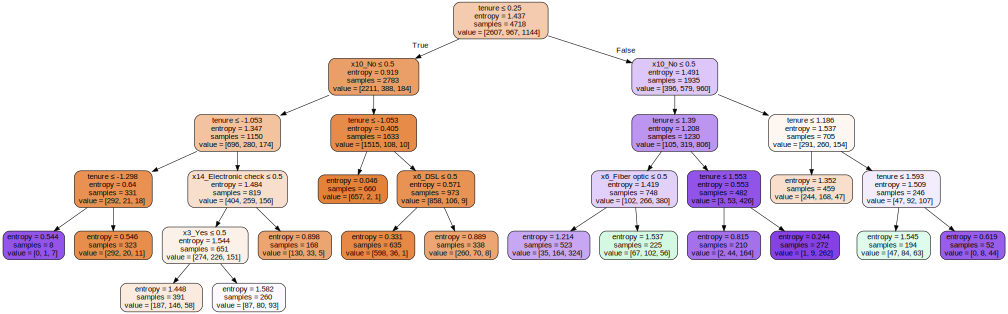

In [48]:
import graphviz
import pydotplus

dot_data = tree.export_graphviz(Cat_tree, feature_names=enc_features, filled=True, rounded=True, special_characters=True, rotate=False, impurity=True)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"14,20!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

### 3.3.3) K-Nearest Neighbors

In [49]:
from sklearn import neighbors

In [50]:
# We aim to select optimal K value that yields the highest accuracy
# Assume the range of k is from 1 to 100 in integer
# Return a sequence of integers for k from 1 to 100
k_range = range(1,101) 
scores_list=[]

for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k,algorithm='auto',leaf_size=80,p=2) 
    knn.fit(X_train, y_train)
    
    scores_list.append(knn.score(X_test, y_test))

Text(0, 0.5, 'Accuracy score')

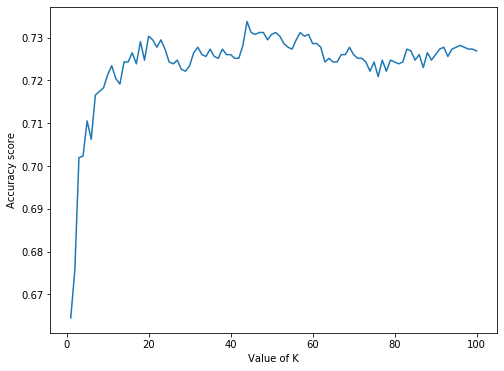

In [51]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

# Make a plot showing accuracy scores vs their corresponding k value
plt.plot(k_range,scores_list)
plt.xlabel('Value of K')
plt.ylabel('Accuracy score')

In [52]:
# Index the point with highest accuracy score, which also has the optimal k value selection
Accuracy_highest = max(scores_list)
K_HighestAccuracy = k_range[scores_list.index(Accuracy_highest)]
print ("Optimal K is",K_HighestAccuracy, "with highest accuracy =",Accuracy_highest)

Optimal K is 44 with highest accuracy = 0.733763440860215


In [53]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=44,algorithm='auto',leaf_size=80,p=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=80, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=44, p=2,
                     weights='uniform')

In [54]:
knn.predict(X_test)

array(['One year', 'Month-to-month', 'Month-to-month', ..., 'Two year',
       'Month-to-month', 'Two year'], dtype=object)

In [55]:
knn_s=knn.score(X_test,y_test)
knn_s

0.733763440860215

### 3.3.4) Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
NaiveBayes = GaussianNB()

In [58]:
NaiveBayes.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [59]:
NaiveBayes.predict(X_test)

array(['One year', 'Month-to-month', 'Month-to-month', ..., 'Two year',
       'One year', 'Two year'], dtype='<U14')

In [60]:
nb_s = NaiveBayes.score(X_test,y_test)
nb_s

0.6455913978494624

### 3.3.5) Support Vector Machine

In [61]:
from sklearn import svm

In [62]:
SVM = svm.LinearSVC(C=1.0,dual=True,loss='hinge',penalty='l2',max_iter=100000,random_state=10)

In [63]:
SVM.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=100000, multi_class='ovr',
          penalty='l2', random_state=10, tol=0.0001, verbose=0)

In [64]:
SVM.predict(X_test)

array(['Two year', 'Month-to-month', 'Month-to-month', ..., 'Two year',
       'Month-to-month', 'Two year'], dtype=object)

In [65]:
svm_s = SVM.score(X_test,y_test)
svm_s

0.730752688172043

### 3.3.6) Neural Network w/ Logistic Activation Function

In [66]:
from sklearn.neural_network import MLPClassifier
#Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation

NeuralNetwork = MLPClassifier(activation='logistic',solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,2),max_iter=2000000, random_state=10)

In [67]:
NeuralNetwork.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 2), learning_rate='constant',
              learning_rate_init=0.001, max_iter=2000000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=10, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [68]:
y_pred = NeuralNetwork.predict(X_test)
y_pred

array(['One year', 'Month-to-month', 'Month-to-month', ..., 'Two year',
       'Month-to-month', 'Two year'], dtype='<U14')

In [69]:
neu_s = NeuralNetwork.score(X_test,y_test)
neu_s

0.7483870967741936

### 3.3.7) Table of Accuracy Score

In [70]:
#Create a table for score comparison of different model of contract prediction 
scoreTable = {'Logistic Regression': [logreg_s],
'K Nearest Neighbors': [knn_s],
'Classification Tree': [class_s],
'Naive Bayes': [nb_s],'Support Vector Machine': [svm_s],'Neural Network-Logit': [neu_s]}
scoreTable = pd.DataFrame(scoreTable)
scoreTable["Classification_Model"] = list(["Accuracy_Score"])
scoreTable = scoreTable.set_index("Classification_Model")
scoreTable = scoreTable.T
scoreTable.sort_values(by="Accuracy_Score",ascending=False)

Classification_Model,Accuracy_Score
Neural Network-Logit,0.748387
Logistic Regression,0.744516
K Nearest Neighbors,0.733763
Support Vector Machine,0.730753
Classification Tree,0.710108
Naive Bayes,0.645591


###  As we can see from above table, for classification model, we should choose Neural Network with Logistic Activation Function as the score of this model is the highest, compared to others. 

### 3.4) Cross Validation for Best Model

In [71]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [72]:
NN_scores = []
y=df['Contract']
x=encFeatures
cv = KFold(n_splits=5, random_state=10, shuffle=False)
for train_index, test_index in cv.split(x):
    print("Train Index: ", train_index, "\n", "Test Index: ", test_index,"\n")
    x_train_k, x_test_k = x.iloc[train_index], x.iloc[test_index]
    y_train_k, y_test_k = y.iloc[train_index], y.iloc[test_index]
    NeuralNetwork.fit(x_train_k, y_train_k)
    NN_scores.append(NeuralNetwork.score(x_test_k, y_test_k))

Train Index:  [1409 1410 1411 ... 7040 7041 7042] 
 Test Index:  [   0    1    2 ... 1406 1407 1408] 

Train Index:  [   0    1    2 ... 7040 7041 7042] 
 Test Index:  [1409 1410 1411 ... 2815 2816 2817] 

Train Index:  [   0    1    2 ... 7040 7041 7042] 
 Test Index:  [2818 2819 2820 ... 4224 4225 4226] 

Train Index:  [   0    1    2 ... 7040 7041 7042] 
 Test Index:  [4227 4228 4229 ... 5632 5633 5634] 

Train Index:  [   0    1    2 ... 5632 5633 5634] 
 Test Index:  [5635 5636 5637 ... 7040 7041 7042] 



In [73]:
np.mean(NN_scores)

0.7533708827988902

###  As we can see from model improvement through cross validation, Neural Network with Logistic Activation Function has better score 75.34% now, which is improved from 74.84% before. 

### 3.5) Evaluation Score for Best Model 

In [74]:
unique(df["Contract"])

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [75]:
from sklearn.metrics import classification_report
y_pred = NeuralNetwork.predict(X_test)
target_names=["Month-to-month",'One year','Two year']

print(classification_report(y_test, y_pred, target_names=target_names,digits=4))

                precision    recall  f1-score   support

Month-to-month     0.8481    0.8983    0.8725      1268
      One year     0.4787    0.4229    0.4491       506
      Two year     0.7570    0.7350    0.7459       551

      accuracy                         0.7561      2325
     macro avg     0.6946    0.6854    0.6891      2325
  weighted avg     0.7461    0.7561    0.7503      2325



### 3.6) Test Best Model by Random Features 

In [76]:
features_cat=enc.get_feature_names(['gender', "SeniorCitizen",'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'PaperlessBilling','PaymentMethod'])

In [77]:
feature_list=features_cat.tolist()
feature_list.append('tenure')
feature_list.append('MonthlyCharges')

In [78]:
feature_list

['gender_Female',
 'gender_Male',
 'SeniorCitizen_0',
 'SeniorCitizen_1',
 'Partner_No',
 'Partner_Yes',
 'Dependents_No',
 'Dependents_Yes',
 'PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'PaperlessBilling_No',
 'PaperlessBilling_Yes',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 

In [ ]:
# Please enter 1 from keyboard if given feature exists and 0 otherwise for categorical features. 
# For example, for feature PhoneService, if a customer has No_phone_service, enter 1; enter 0 for PhoneService_Yes and PhoneService_No
# Please enter z-score for numerical features 'Tenure' and 'MonthlyCharges'
new_test_list=[]
for feature in feature_list:
    print("What is your data for",feature)
    data=input("enter your data:")
    new_test_list.append(data)

What is your data for gender_Female
enter your data:0
What is your data for gender_Male
enter your data:1
What is your data for SeniorCitizen_0


In [80]:
new_test_temp=reshape(array(new_test_list*1),(1,len(new_test_list)))
new_test=new_test_temp.astype(float64)

In [82]:
NeuralNetwork.predict(new_test)

array(['Month-to-month'], dtype='<U14')

### Conclusion: <br>The target of classification model is predicting types of contract. Based on the demographic information, we can use Neural Network with Logistic Activation Function to predict types of contract. Therefore, in the future, once we collect such information, we can predict the types of contract that are most likely to be signed by prospective customers. For example, those customers who have 2-year contract will bring more profits to the company than customers who have 1-month contract, and we should spend more time providing CRM (Customer Relationship Management) service.

# Summary

### 1) We successfully built up four customer segments using unsupervised model through  K-Means.

### 2) We were able to predict profits using supervised regression model through Linear Regression with Ridge. 

### 3) We were able to predict types of contract using supervised classification model through Neural Network with Logistic Activation Function. 